In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [2]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\ynyg\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated


In [3]:
epochs['rest','left']

Number of events,48
Events,left: 20rest: 28
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [4]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [5]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,1,6.446001,-2.389683,-95.057476,168.578015,19.122974,3.008437,-4.283171,...,16.332895,3.307015,19.963738,1.543617,-207.614197,204.935481,15.375475,2.110316,-166.506332,232.931721
1,5.120,rest,1,6.904420,-2.004028,-203.974370,308.147894,19.991869,2.879153,-4.853418,...,16.272308,3.313668,20.163681,1.564748,-281.401881,295.287406,15.538362,2.067600,-129.090782,190.586172
2,5.248,rest,1,7.457762,-1.466886,-297.526043,427.591876,20.337064,2.974299,-5.028200,...,16.080296,3.288299,20.223277,1.625873,-345.948298,372.049282,15.528944,1.954288,-80.517646,133.579510
3,5.376,rest,1,8.017255,-0.828728,-361.986371,511.900347,20.143880,3.297648,-4.661359,...,15.774074,3.270640,20.177853,1.714649,-395.564770,427.324587,15.381120,1.709468,-26.499300,69.193367
4,5.504,rest,1,8.469568,-0.162177,-388.167566,551.889359,19.486513,3.794726,-3.655610,...,15.379030,3.295325,20.065459,1.813930,-426.839280,456.114183,15.128456,1.283084,26.469143,5.759398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,11.520,rest,105,-5.620853,-4.547639,188.298261,-147.854298,28.682318,-3.048847,29.463476,...,40.065977,-1.663486,28.002767,0.167173,163.079763,-33.495548,27.684209,-6.179848,13.058821,-1.709385
2684,11.648,rest,105,-3.841173,-3.684682,321.549916,-251.599529,32.576445,-2.653820,30.041816,...,43.778273,-2.581661,28.743154,0.401209,151.697604,-49.076545,27.432896,-6.330177,1.236721,0.445377
2685,11.776,rest,105,-3.109141,-3.691984,455.162633,-351.491995,35.567733,-2.657722,30.087534,...,46.502253,-3.808057,28.974100,0.645244,117.403688,-45.016619,26.839447,-6.355804,-6.825381,-1.073044
2686,11.904,rest,105,-3.380221,-4.538826,566.164206,-428.419095,37.505710,-3.008514,29.722130,...,48.116042,-5.214784,28.713594,0.852517,64.632033,-20.759677,26.012551,-6.332137,-11.133312,-5.047274


In [6]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [7]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_10296\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_10296\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_10296\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_10296\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [8]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
1,rest,5.421185,184.850130,14.284081,11.504216,126.665707,6.951670,13.641969,13.535252,9.341031,15.628708,6.145505,10.804616,17.832574,9.948539,15.101419,15.756328,10.446609,103.538286,14.600803,68.596254
2,left,1.260042,180.188216,4.620579,5.731168,141.582288,4.046303,7.736848,9.627400,9.055154,16.122783,3.216029,3.398069,15.152254,6.052722,9.398271,7.424755,8.807644,91.970084,5.822209,81.837994
3,rest,1.552615,385.373163,14.098234,9.357925,201.151130,3.708979,10.597903,6.186499,7.258604,6.379552,3.101473,4.356702,10.152518,9.429585,12.804589,8.164325,7.890130,142.199553,8.829014,56.258585
8,rest,8.710200,231.501262,18.485329,12.286842,309.535117,10.930374,12.132436,16.665411,19.168493,27.071679,8.046027,7.122648,15.268601,15.551145,18.227619,17.388218,11.395740,203.409312,11.953293,69.355468
10,rest,4.512818,193.419804,14.569902,7.624510,237.707895,3.504269,10.622169,12.383947,5.127825,22.337769,2.726278,6.804745,9.108049,16.705440,9.755960,12.790048,8.990175,185.003069,11.243528,48.716534
13,left,2.619517,98.094052,7.683185,6.210660,241.165113,4.176259,7.109556,6.355731,6.081928,27.033814,4.728677,7.158390,16.752999,6.209237,8.846193,7.304408,6.377623,150.966943,6.315245,67.173341
14,left,3.294852,226.103079,2.427184,5.557731,198.868946,2.443418,4.563502,3.063148,3.234644,18.458276,2.685986,1.787823,9.861424,5.172002,5.727976,2.340261,2.231118,149.675116,3.697474,62.473849
15,left,5.204085,229.678745,4.965967,5.659025,181.557656,3.504977,5.073832,5.037690,6.542439,23.281808,3.296581,4.351014,12.368707,5.271959,7.214104,7.421560,3.763796,113.104808,6.542188,34.394073
18,rest,0.935499,274.190437,4.855199,6.055637,182.643229,2.670184,4.394864,4.151868,2.969266,20.253123,2.101051,2.979504,13.783085,5.557324,5.577993,2.696995,1.666495,245.726728,1.959078,67.247065


In [9]:
grouped = mean.groupby(['epoch','condition']).count()

In [10]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [11]:
grouped.index.values

array([(1, 'rest'), (2, 'left'), (3, 'rest'), (8, 'rest'), (10, 'rest'),
       (13, 'left'), (14, 'left'), (15, 'left'), (18, 'rest'),
       (20, 'rest'), (25, 'left'), (29, 'rest'), (30, 'left'),
       (33, 'rest'), (34, 'left'), (35, 'rest'), (39, 'rest'),
       (40, 'left'), (42, 'rest'), (46, 'rest'), (47, 'left'),
       (48, 'left'), (49, 'rest'), (51, 'rest'), (53, 'rest'),
       (56, 'rest'), (62, 'left'), (63, 'left'), (64, 'rest'),
       (66, 'rest'), (67, 'left'), (68, 'rest'), (75, 'left'),
       (76, 'rest'), (78, 'rest'), (83, 'left'), (84, 'rest'),
       (85, 'left'), (88, 'rest'), (89, 'left'), (92, 'rest'),
       (93, 'left'), (94, 'rest'), (96, 'left'), (98, 'rest'),
       (99, 'left'), (101, 'rest'), (105, 'rest')], dtype=object)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [14]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [19]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

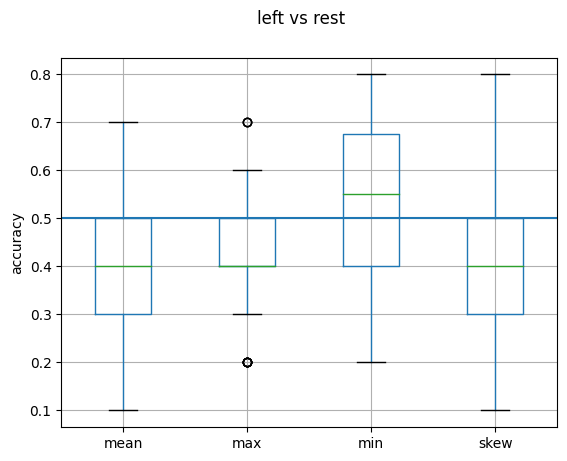

In [20]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [21]:
scores_df.median().to_numpy()

array([0.4 , 0.4 , 0.55, 0.4 ])